In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import data from csv
yield_curve_df = pd.read_csv('yield_data/Short-term_20221214.csv')
yield_curve_df

,Unnamed: 0,bond_ttm,risk_free_rate
0,0,0.25,0.027790
1,1,0.50,0.028659
2,2,1.00,0.030361
3,3,3.00,0.035310
4,4,5.00,0.036518
5,5,7.00,0.036524
6,6,10.00,0.037181


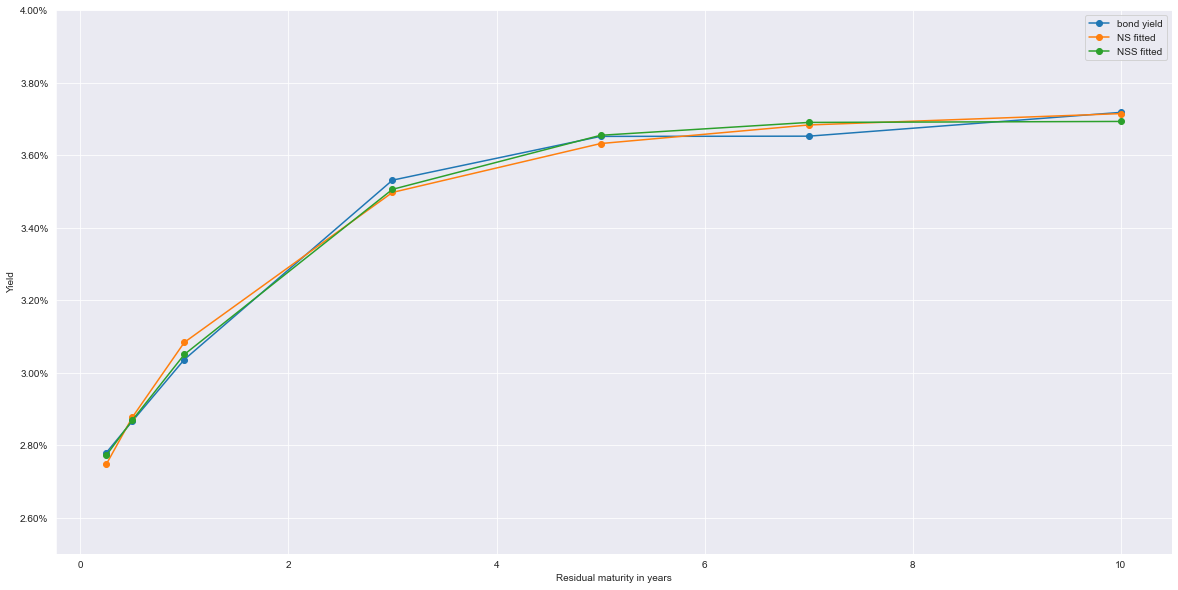

In [8]:
# compare data
import seaborn as sns
from NS_yield_curve import ns, ns_curve_fit
from NSS_yield_curve import nss, nss_curve_fit
# input bond tenor together with risk free rate
t = yield_curve_df.bond_ttm
rates = yield_curve_df.risk_free_rate
# nelson siegel model
import numpy as np
tenors = np.linspace(0.25, 10)
params = ns_curve_fit(t, rates)
fitted_data = ns(params, tenors)
# nss model
nss_params = nss_curve_fit(t, rates)
nss_fitted_data = nss(nss_params, tenors)
# plot comparison
fig, ax = plt.subplots(figsize=(20,10))
plt.plot('bond_ttm', 'risk_free_rate', data=yield_curve_df, marker='o',label='bond yield')
plt.plot(tenors, fitted_data, label = 'NS fitted')
plt.plot(tenors, nss_fitted_data, label = 'NSS fitted')
ax.legend()
plt.xlabel('Residual maturity in years')
plt.ylabel('Yield')
# set y axis
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylim(0.025, 0.04)
plt.show()

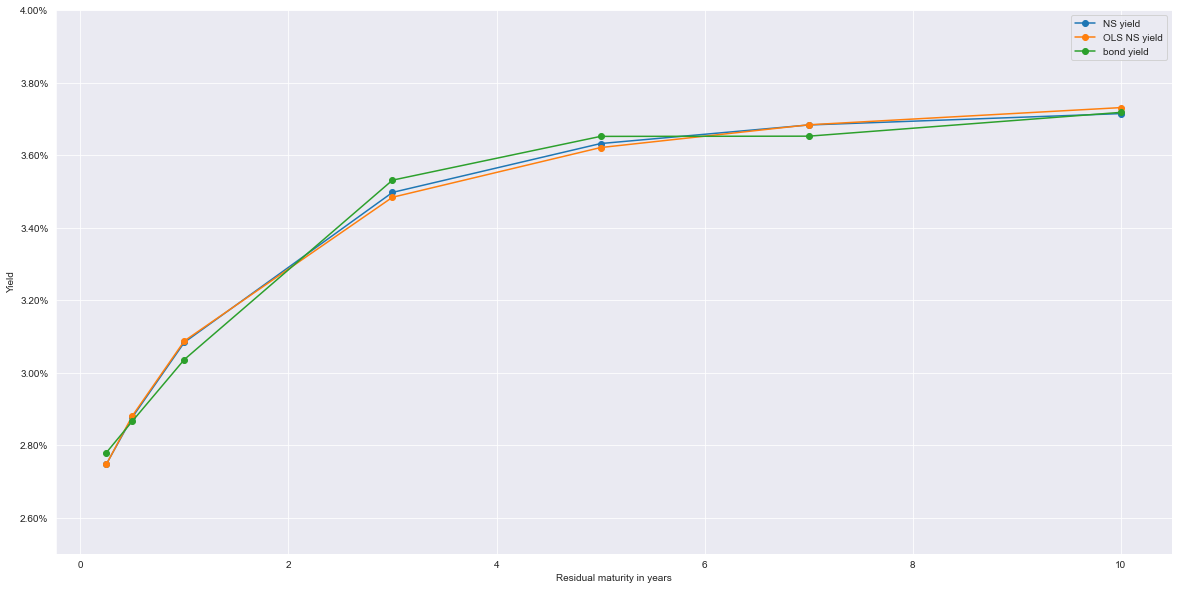

In [4]:
# compare original NS model with OLS calibrated
from NS_yield_curve import ns_ols_fit
ns_params = ns_curve_fit(t, rates)
ns_fitted_data = ns(ns_params, t)
ols_params = ns_ols_fit(t, rates)
ols_data = ns(ols_params, t)
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(t, ns_fitted_data, marker='o', label ='NS yield')
plt.plot(t, ols_data, marker='o', label = 'OLS NS yield')
plt.plot(t, rates, marker='o',label='bond yield')
ax.legend()
plt.xlabel('Residual maturity in years')
plt.ylabel('Yield')
# set y axis
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylim(0.025, 0.04)
plt.show()

In [12]:
# results from library
# 0    0.027466
# 1    0.028805
# 2    0.030874
# 3    0.034838
# 4    0.036210
# 5    0.036838
# 6    0.037312

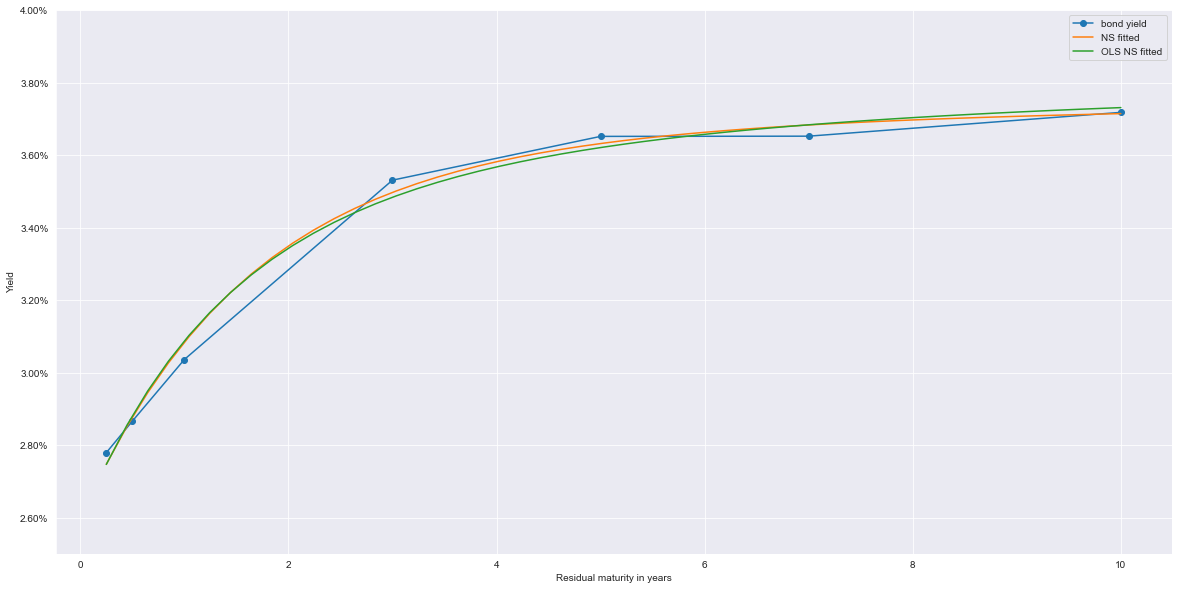

In [5]:
ttm = yield_curve_df.bond_ttm
rates = yield_curve_df.risk_free_rate
# nelson siegel model
import numpy as np
from NS_yield_curve import ns_ols_fit
tenors = np.linspace(0.25, 10)
ols_params = ns_ols_fit(ttm, rates)
ols_data = ns(ols_params, tenors)
plt.plot(tenors, ols_data)